## Logistic Regression
is a statistical technique capable of predicting a binary outcome. It's a well-known strategy, widely used in disciplines ranging from credit and finance to medicine to criminology and other social sciences. Logistic regression is fairly intuitive and very effective

In [22]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl

In [23]:
# We'll be using the same dataset as UCLA's Logit Regression in R
df = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv")

In [24]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [25]:
# rename the 'rank' column because there is also a DataFrame method called 'rank'
# rank or prestige is an applicant's undergraduate alma mater
df.columns = ["admit", "gre", "gpa", "prestige"]
df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [26]:
# Summary Statistics
df.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [27]:
pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


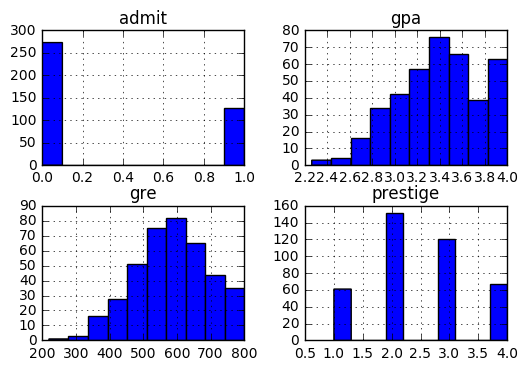

In [28]:
df.hist()
pl.show()

In [29]:
# dummify rank
#dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
#dummy_ranks.head()

In [30]:
#cols_to_keep = ['admit', 'gre', 'gpa']
#df1 = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])

In [31]:
#df1.head(10)

In [37]:
train_cols = df.columns[1:]
train_cols

Index(['gre', 'gpa', 'prestige'], dtype='object')

In [39]:
logit = sm.Logit(df['admit'], df[train_cols])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.586372
         Iterations 5


In [40]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Wed, 30 Nov 2016   Pseudo R-squ.:                 0.06176
Time:                        12:10:02   Log-Likelihood:                -234.55
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 1.971e-07
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0015      0.001      1.420      0.155        -0.001     0.004
gpa           -0.0042      0.201     -0.021      0.983        -0.398     0.390
prestige      -0.6695      0.121     -5.527      0.000        -0.907    -0.432
==============================================================================
"""

# Logistic Regression with scikit-learn

The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy.

Description of Variables
The dataset contains 6366 observations of 9 variables:

rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
- age: woman's age
- yrs_married: number of years married
- children: number of children
- religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
- educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
- occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
- occupation_husb: husband's occupation (same coding as above)
- affairs: time spent in extra-marital affairs

# Problem Statement
I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman.

Skipper Seabold, one of the primary contributors to Statsmodels, did a similar classification in his Statsmodels demo at a Statistical Programming DC Meetup. However, he used Statsmodels for the classification (whereas I'm using scikit-learn), and he treated the occupation variables as continuous (whereas I'm treating them as categorical).

In [105]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_curve, auc
# show plots in the notebook
%matplotlib inline

In [63]:
# load dataset
df = sm.datasets.fair.load_pandas().data
# Preprocessing
# add "affair" column: 1 represents having affairs, 0 represents not
df['affair'] = (df.affairs > 0).astype(int)

In [64]:
# Data Exploration
df.groupby('affair').mean()
# We can see that on average, women who have affairs rate their marriages lower, which is to be expected. Let's take another look at the rate_marriage variable.

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [65]:
df.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


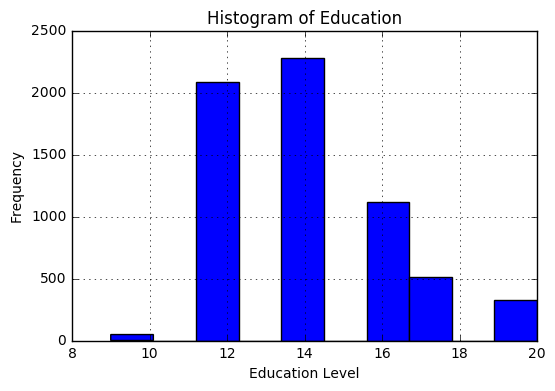

In [66]:
# histogram of education
df.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

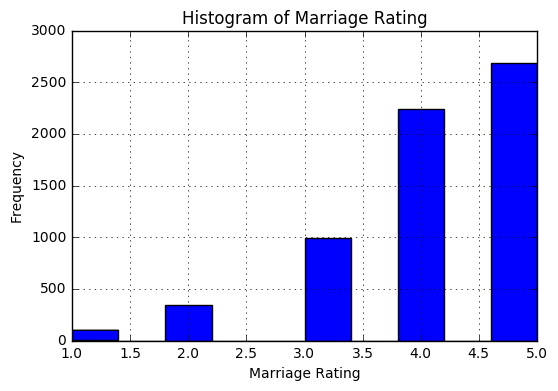

In [67]:
# histogram of marriage rating
df.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

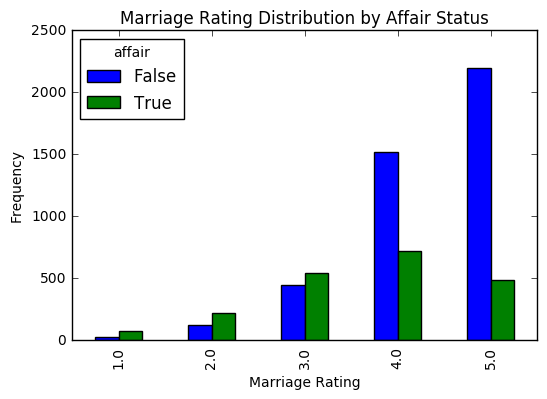

In [68]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(df.rate_marriage, df.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

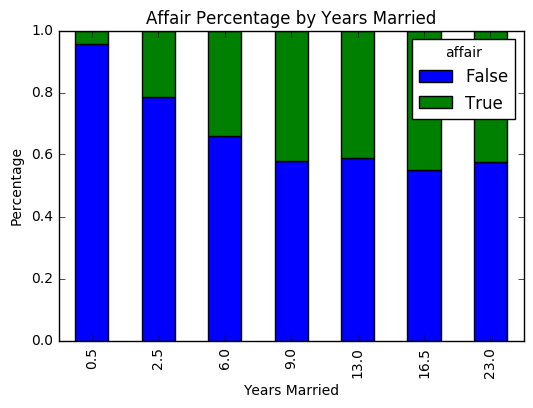

In [69]:
affair_yrs_married = pd.crosstab(df.yrs_married, df.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

In [56]:
# create dataframes with an intercept column and dummy variables for
# occupation and occupation_husb
#y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
#                 religious + educ + C(occupation) + C(occupation_husb)',
#                dta, return_type="dataframe")
#X.columns

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')

In [57]:
# fix column names of X
#X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
#                       'C(occupation)[T.3.0]':'occ_3',
#                      'C(occupation)[T.4.0]':'occ_4',
#                        'C(occupation)[T.5.0]':'occ_5',
#                        'C(occupation)[T.6.0]':'occ_6',
#                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
#                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
#                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
#                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
#                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [73]:
#y = np.ravel(y)
#y
df.head(4)
#df.affair.value_counts()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1


In [75]:
feature_cols = ['rate_marriage', 'age', 'yrs_married','children','religious','educ','occupation','occupation_husb']
X = df[feature_cols]
y = df.affair

In [78]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)
#73% accuracy seems good, but what's the null error rate?

0.72368834432924911

In [80]:
# what percentage had affairs?
y.mean()
# Only 32% of the women had affairs, which means that you could obtain 68% accuracy by always predicting "no". So we're doing better than the null error rate, but not by much.

0.3224945020420987

# Model Evaluation Using a Validation Set

In [95]:
print(X.columns)
print(model.coef_)
# Increases in marriage rating and religiousness correspond to a decrease in the likelihood of having an affair. 
# For both the wife's occupation and the husband's occupation, the lowest likelihood of having an affair corresponds to the 
# baseline occupation (student), since all of the dummy coefficients are positive.

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb'],
      dtype='object')
[[-0.70229565 -0.05467434  0.10507701 -0.00117135 -0.36711831 -0.03280731
   0.16141169  0.01457367]]


In [96]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [97]:
# predict class labels for the test set
predicted = model2.predict(X_test)
print(predicted)

[1 0 0 ..., 0 0 0]


In [98]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print(probs)

[[ 0.38585625  0.61414375]
 [ 0.92283519  0.07716481]
 [ 0.68072983  0.31927017]
 ..., 
 [ 0.53451668  0.46548332]
 [ 0.80407938  0.19592062]
 [ 0.77313855  0.22686145]]


In [100]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.730366492147
0.744743153867


In [101]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[1175  128]
 [ 387  220]]
             precision    recall  f1-score   support

          0       0.75      0.90      0.82      1303
          1       0.63      0.36      0.46       607

avg / total       0.71      0.73      0.71      1910



In [102]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[ 0.71630094  0.69749216  0.74137931  0.71226415  0.70125786  0.73113208
  0.71855346  0.70125786  0.74842767  0.75314465]
0.722121014964


In [114]:
actual = y_train
predictions = model2.predict(X_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

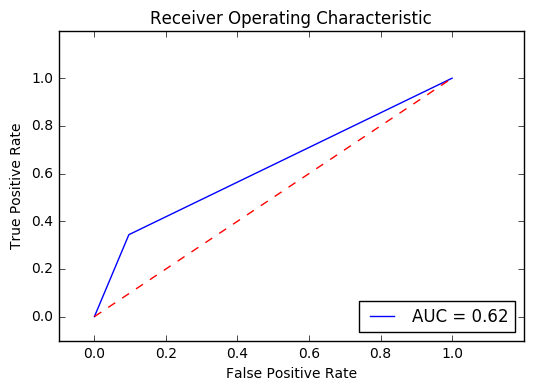

In [115]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()